In [3]:
import matplotlib.pyplot as plt
from lib.preprocess import preprocess_progenitor_size, preprocess_whole_size
from lib.utils import shrink_and_align_stats
from lib.score import REF
from lib.analyser import show_curve, show_curve_progenitor
from jf.utils.export import Exporter
from jf.autocompute.jf import L
from jf.models.stringmodel import read_model
import os
import numpy as np

In [4]:
sm = read_model("generation")

In [5]:
from lib.sde.grn.grn2 import GRNMain2
from lib.sde.mutate import mutate_grn2

class Solution:
    def __init__(self, grn):
        self.grn = grn
        
    def copy(self):
        return Solution(self.grn.copy())
        
    def mutate(self):
        mutate_grn2(self.grn)

In [6]:
def plot_max_fitness(exporter, sm):
    ls = list(filter(sm.match, sorted(exporter.list())))
    vals = [(int(sm.extract(x)["generation"]), max(L(exporter.load(x)).fit)) for x in ls]
    vals.sort()
    plt.title("Max fitness")
    plt.plot(*zip(*vals))
    plt.ylim(bottom=0)
    
def plot_sum_fitness(exporter, sm):
    ls = list(filter(sm.match, sorted(exporter.list())))
    vals = [(int(sm.extract(x)["generation"]), sum(L(exporter.load(x)).fit)) for x in ls]
    vals.sort()
    plt.title("Sum fitness")
    plt.plot(*zip(*vals))
    plt.ylim(bottom=0)

In [7]:
# sm.pick_last(sorted(exporter.list()), slot="generation")

In [9]:
sorted(os.listdir("output/"))

['.ipynb_checkpoints',
 '2022-01-26',
 '2022-01-27',
 '2022-01-28',
 '2022-01-29',
 'default',
 'exp_stability',
 'exp_stability_v2',
 'logs',
 'mutationv3_t0.5_n5_o2.0_i0',
 'mutationv3_t0.5_n5_o2.0_i1',
 'mutationv3_t0.5_n5_o2.0_i2',
 'mutationv3_t0.5_n7_o2.0_i0',
 'mutationv3_t0.5_n7_o2.0_i1',
 'mutationv3_t0.5_n7_o2.0_i2',
 'mutationv3_t0.5_n9_o2.0_i0',
 'mutationv3_t0.5_n9_o2.0_i1',
 'objective_0.25_g11_v5',
 'objective_0.25_g7_v5',
 'objective_0.25_g9_v5',
 'objective_0.5_g11_v5',
 'objective_0.5_g7_v5',
 'objective_0.5_g9_v5',
 'objective_1.0_g11_v5',
 'objective_1.0_g7_v5',
 'objective_1.0_g9_v5',
 'result_m1_t0.5_n7_o1.5_i0',
 'result_m1_t0.5_n7_o1.5_i1',
 'result_m1_t0.5_n7_o1.5_i2',
 'result_m1_t0.5_n7_o1.5_i3',
 'result_m1_t0.5_n7_o1.5_i4',
 'result_m3_t0.25_n7_o1.5_i0',
 'result_m3_t0.25_n7_o1.5_i1',
 'result_m3_t0.25_n7_o1.5_i2',
 'result_m3_t0.25_n7_o1.5_i3',
 'result_m3_t0.25_n7_o1.5_i4',
 'result_m3_t0.5_n5_o1.5_i0',
 'result_m3_t0.5_n5_o1.5_i1',
 'result_m3_t0.5_n5_o1

In [11]:
def score_one(name):
    exporter = Exporter(name=name, silent=True)
    last_gen = sm.pick_last(exporter.list(), slot="generation")
    if last_gen is None:
        return None
    res = exporter.load(last_gen)
    return max(res, key=lambda x: x.fit).fit

def score_prefix(prefix, ls):
    scores = []
    for x in ls:
        if not x.startswith(prefix):
            continue
        s = score_one(x)
        if s is not None:
            scores.append(s)
    return scores

In [39]:
s5 = score_prefix("unary_evolver_t0.5_n5_o2.0", os.listdir("output/"))
print("5", np.mean(s5), np.std(s5), s5)
s7 = score_prefix("unary_evolver_t0.5_n7_o2.0", os.listdir("output/"))
print("7", np.mean(s7), np.std(s7), s7)
s9 = score_prefix("unary_evolver_t0.5_n9_o2.0", os.listdir("output/"))
print("9", np.mean(s9), np.std(s9), s9)

5 30.584414846009125 3.3479711532412977 [30.59025235412552, 33.16353119817498, 25.11804435545351, 33.46583147628249]
7 21.395854176464965 4.053112182021168 [15.71833375256463, 24.917182273111234, 23.552046503719033]
9 11.55262444100003 1.7953218849269086 [10.808249682552544, 9.8226223259141, 14.027001314533441]


In [40]:
s5 = score_prefix("mutationv3_t0.5_n5_o2.0", os.listdir("output/"))
print("5", np.mean(s5), np.std(s5), s5)
s7 = score_prefix("mutationv3_t0.5_n7_o2.0", os.listdir("output/"))
print("7", np.mean(s7), np.std(s7), s7)
s9 = score_prefix("mutationv3_t0.5_n9_o2.0", os.listdir("output/"))
print("9", np.mean(s9), np.std(s9), s9)

5 13.173643861016046 5.9011772593811385 [7.801123197754218, 7.009737117248444, 20.658433939860366, 17.225281189201155]
7 9.8827855164421 4.462092448563699 [7.620999567361062, 6.877575718605738, 7.435757217808891, 17.596809561992707]
9 11.301997747107327 7.031740130433826 [7.719480723020142, 7.795306797762066, 23.435016388474036, 6.2581870791730605]


In [56]:
exporter = Exporter(name="mutationv3_t0.5_n5_o2.0_i0")
len(exporter.list())

Exporting at output/mutationv3_t0.5_n5_o2.0_i0


32

In [57]:
res = exporter.load("generation_g22")

In [58]:
def pick_best(res):
    return res[res.index(max(res, key=lambda x: x.fit))]

In [59]:
best_sol = pick_best(res)

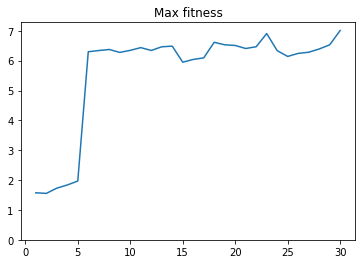

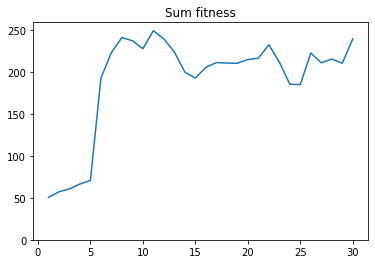

In [44]:
plot_max_fitness(exporter, sm)
plt.show()
plot_sum_fitness(exporter, sm)

In [60]:
best_sol.grn

>> G_0: init: 0.40; noise: 7.30; b: 7.37; m: 9.63; expr: 1.18; deg: 0.41; theta: 8.19; tree : (NOT 1 AND (0 AND 2))
>> G_1: init: 0.58; noise: 7.10; b: 2.02; m: 6.21; expr: 3.28; deg: 2.56; theta: 5.53; tree : NOT ((1 OR 3) OR 2)
>> G_2: init: 2.37; noise: 4.85; b: 3.28; m: 6.05; expr: 0.37; deg: 0.83; theta: 1.41; tree : (0 OR (1 OR 2))
>> G_3: init: 1.37; noise: 1.64; b: 8.26; m: 6.72; expr: 4.81; deg: 0.85; theta: 1.83; tree : (4 AND NOT 1)
>> G_4: init: 1.21; noise: 8.62; b: 9.59; m: 5.50; expr: 1.58; deg: 1.19; theta: 1.80; tree : (NOT 4 OR 1)

Exporting at output/mutationv3_t0.5_n5_o2.0_i3
generation_g9
17.225281189201155


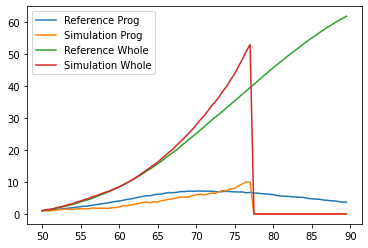

In [66]:
exporter = Exporter(name="mutationv3_t0.5_n5_o2.0_i3")
last_gen = sm.pick_last(sorted(exporter.list()), slot="generation")
print(last_gen)
res = exporter.load(last_gen)
sol = pick_best(res)
print(sol.fit)
show_curve(sol.stats, REF)

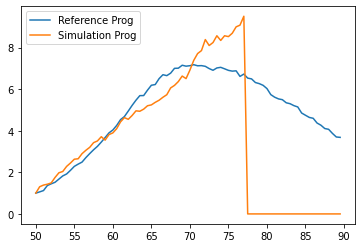

In [38]:
show_curve_progenitor(sol.stats, REF)

fit is  2.1746606933406607


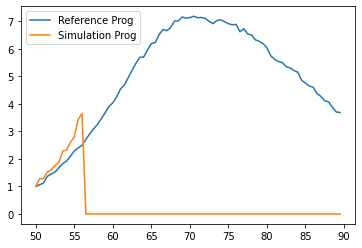

>> G_0: init: 0.06; noise: 3.79; b: 2.86; m: 4.03; expr: 2.54; deg: 4.32; theta: 5.52; tree : 7
>> G_1: init: 2.86; noise: 7.07; b: 2.92; m: 5.74; expr: 2.27; deg: 6.08; theta: 4.74; tree : NOT NOT 0
>> G_2: init: 1.13; noise: 6.18; b: 9.64; m: 5.20; expr: 3.36; deg: 5.47; theta: 6.91; tree : (0 OR 5)
>> G_3: init: 0.48; noise: 3.01; b: 2.34; m: 4.10; expr: 8.11; deg: 2.51; theta: 1.83; tree : 8
>> G_4: init: 1.51; noise: 1.04; b: 9.51; m: 3.22; expr: 5.22; deg: 6.85; theta: 7.17; tree : NOT (((((2 OR 10) AND 8) OR NOT 7) AND 1) OR 5)
>> G_5: init: 2.39; noise: 5.04; b: 9.15; m: 7.59; expr: 3.52; deg: 3.62; theta: 5.87; tree : NOT 0
>> G_6: init: 1.51; noise: 3.09; b: 9.33; m: 6.17; expr: 0.94; deg: 2.34; theta: 0.38; tree : (NOT (5 AND 0) OR 10)
>> G_7: init: 0.76; noise: 7.25; b: 5.20; m: 5.94; expr: 4.05; deg: 6.64; theta: 4.89; tree : NOT (NOT 8 OR (9 AND 7))
>> G_8: init: 1.10; noise: 3.60; b: 4.94; m: 8.33; expr: 2.74; deg: 2.73; theta: 3.00; tree : (3 AND (0 AND 6))
>> G_9: init

In [57]:
res = exporter.load(last_gen)
sol, stats = pick_best_sol_stats(res)
show_curve_progenitor(stats, REF)
sol.grn

G_1: init: 2.89; noise: 5.98; b: 5.55; m: 5.53; expr: 7.05; deg: 0.04; thr: 5.68; theta: 3.47; tree : ((NOT (NOT NOT 4 AND 5) AND 6) OR 1)
G_1: init: 2.89; noise: 5.98; b: 5.55; m: 5.53; expr: 7.05; deg: 0.04; thr: 5.68; theta: 3.47; tree : ((NOT (NOT NOT 4 AND 3) AND 6) OR 1)
G_1: init: 2.89; noise: 5.98; b: 5.55; m: 5.53; expr: 7.05; deg: 0.04; thr: 5.68; theta: 3.47; tree : ((NOT (NOT NOT 4 AND 5) AND 6) OR 1)
G_1: init: 2.89; noise: 5.98; b: 5.55; m: 5.53; expr: 7.05; deg: 0.04; thr: 5.68; theta: 7.90; tree : ((NOT (NOT NOT 4 AND 5) AND 6) OR 1)

G_1: init: 2.89; noise: 5.98; b: 5.55; m: 5.87; expr: 7.05; deg: 0.04; thr: 5.68; theta: 3.47; tree : (NOT (NOT NOT 4 AND 5) OR 1)